# Question 1


### On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of 3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 
 -	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.  

In [13]:
import pandas as pd
import numpy as np

In [14]:
# read the file
df = pd.read_csv("C:/Users/nahid/Downloads/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [15]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [16]:
# to get the calculated method to get the AOV
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [19]:

df['order_amount'].median()

284.0

In [20]:
df['order_amount'].mode()

0    153
dtype: int64

# It shows that the metric used for AOV was mean.

In [6]:
# to confirm the total number of store
len(df['shop_id'].unique())


100

array([[<AxesSubplot:title={'center':'order_amount'}>]], dtype=object)

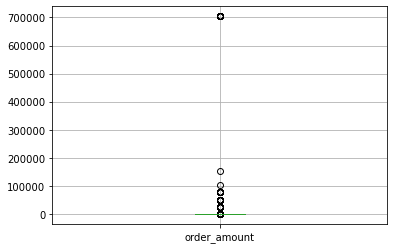

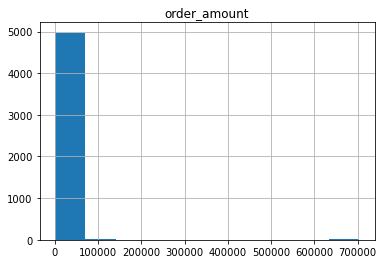

In [8]:
df.boxplot(column='order_amount')
df.hist(column = 'order_amount')

###  Lets take a look at the max amount in the dataset which is a outlier as it shows in the above histogram. Total_items of each order is not a normal order and it might be ordered by an supplier which increased the value of AOV incredibly.

In [9]:
df[df['order_amount'] == 704000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


### For now I will remove those orders from the dataset to evaluate the meen and midian for the rest of orders.

<AxesSubplot:>

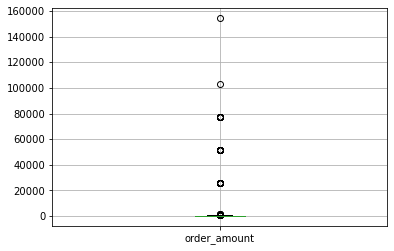

In [22]:
dfWithNoHugeAmount= df[df.order_amount < 704000]
dfWithNoHugeAmount.order_amount.describe()
dfWithNoHugeAmount.boxplot(column='order_amount')

In [23]:
dfWithNoHugeAmount['order_amount'].mode()

0    153
dtype: int64

In [24]:
dfWithNoHugeAmount['order_amount'].median()

284.0

### Although, we have better distribution of order_amount, there are some orders that seems to be outlier too. I am going to get the first 40 rows form the highest numbers.

In [29]:
dfWithNoHugeAmount.sort_values(by= 'order_amount', ascending=False).head(40)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:26
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35
2564,2565,78,915,77175,3,debit,2017-03-25 1:19:35
2906,2907,78,817,77175,3,debit,2017-03-16 3:45:46
4715,4716,78,818,77175,3,debit,2017-03-05 5:10:44
3403,3404,78,928,77175,3,debit,2017-03-16 9:45:05
4192,4193,78,787,77175,3,credit_card,2017-03-18 9:25:32


In [30]:
print(df.loc[df['shop_id'].isin([78])].order_amount.describe())

count        46.000000
mean      49213.043478
std       26472.227449
min       25725.000000
25%       25725.000000
50%       51450.000000
75%       51450.000000
max      154350.000000
Name: order_amount, dtype: float64


### The shop_id 78 is selling expensive items that can affect our analysis for the AOV and this one is the another outlier that we can ignore, since these items are not the most frequently sold items.

In [25]:
dfWithNoUnormal=  df[(df.order_amount < 704000) & (df.shop_id != 78)] # remove the outliers and store the
dfWithNoUnormal.order_amount.describe()

count    4937.000000
mean      302.580514
std       160.804912
min        90.000000
25%       163.000000
50%       284.000000
75%       387.000000
max      1760.000000
Name: order_amount, dtype: float64

In [24]:
dfWithNoUnormal['order_amount'].mode()

284.0

In [26]:
dfWithNoUnormal['order_amount'].median()

284.0

array([[<AxesSubplot:title={'center':'order_amount'}>]], dtype=object)

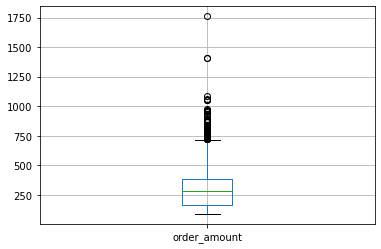

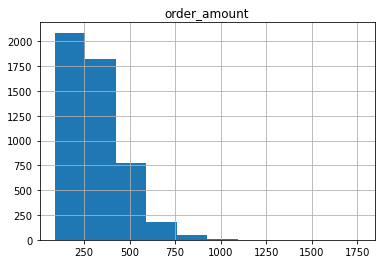

In [31]:
dfWithNoUnormal.boxplot(column='order_amount')
dfWithNoUnormal.hist(column = 'order_amount')

### Now we have better histogram that shows the spread of the most frequently sold items.

### I would use median to calculate the AOV for this dataset, because it always give me the acurate number and it shows the middle value among all the items and its value is 284.00.

# Question 2


### a.	How many orders were shipped by Speedy Express in total? 54

In [10]:
       SELECT  COUNT(o.OrderID)  FROM Orders as o
       WHERE(select s.ShipperID from Shippers as s
	   WHERE s.ShipperName ="Speedy Express")= o.ShipperID;


SyntaxError: invalid syntax (Temp/ipykernel_12360/2676052360.py, line 1)

### b.	What is the last name of the employee with the most orders? Peacock

In [11]:
SELECT TOP 1 e.LastName
FROM Orders as o
INNER JOIN Employees as e ON o.EmployeeID = e.EmployeeID
GROUP BY e.LastName
ORDER BY count(o.OrderID) DESC;


SyntaxError: invalid syntax (Temp/ipykernel_12360/1348796809.py, line 1)

### c.	What product was ordered the most by customers in Germany? Boston Crab Meat

In [ ]:
SELECT TOP 1 Products.ProductName, SUM(Quantity)
FROM Products, Orders,OrderDetails, Customers
Where Country = "Germany" and Products.ProductId = OrderDetails.ProductID and Orders.OrderID = OrderDetails.OrderID and Customers.CustomerID = Orders.CustomerID
group by ProductName
Order BY SUM(Quantity) DESC;